In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Pooja/PDL/hepatitis.csv")
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [4]:
#df.dtypes
df.columns[df.dtypes=='object']

Index([], dtype='object')

In [5]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [6]:
df.shape


(142, 20)

In [7]:
df.isnull().sum()


class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [8]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.816901,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,0.388116,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


2    116
1     26
Name: class, dtype: int64


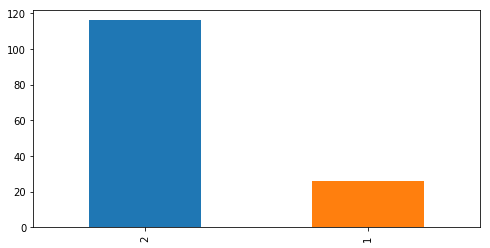

In [10]:
#Exploratory data analysis 
target_label = {"Die":1, "Live":2}
# plotting 
plt.figure(figsize=(8,4))
df['class'].value_counts().plot(kind='bar')
print(df['class'].value_counts())

[2 1]
1    127
2     15
Name: sex, dtype: int64


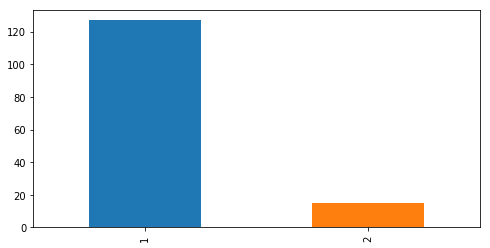

In [11]:
print(df['sex'].unique())
print(df['sex'].value_counts())

#plot gender - male-1, female-2
plt.figure(figsize=(8,4))
df['sex'].value_counts().plot(kind='bar')

In [12]:
#age wise classification
labels = ["< 10","10-20","20-30","30-40","40-50","50-60", "60-70"," > 70"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()
freq_df = freq_df.reset_index(name='count')
freq_df

,age,count
0,< 10,1
1,10-20,3
2,20-30,27
3,30-40,46
4,40-50,34
5,50-60,22
6,60-70,7
7,> 70,2


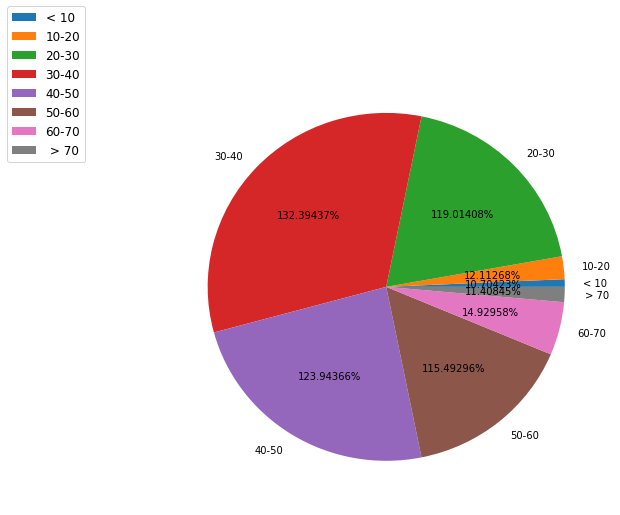

In [23]:
labels = ["< 10","10-20","20-30","30-40","40-50","50-60", "60-70"," > 70"]
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(freq_df['count'], labels = labels, autopct = '1%.5f%%')
plt.legend(loc='upper right', prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure)
plt.show()

Text(0.5, 1.0, 'Frequency count of Age')

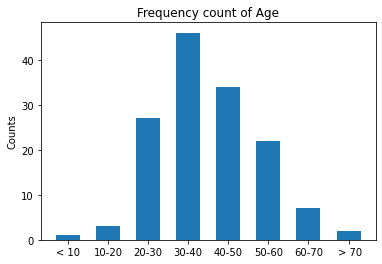

In [30]:
width=0.6
plt.bar(freq_df['age'],freq_df['count'],width)
plt.ylabel('Counts')
plt.title('Frequency count of Age')